In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  


from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

In [4]:
data = pd.read_csv('sample_traj_data.csv')

data.head()

data.dtypes

,alt,ve,vi
0,0.0556,0.000644,407.864566
1,0.0556,0.000370,407.864560
2,0.0556,0.000251,407.864524
3,0.0556,0.000324,407.864588
4,0.0556,0.000321,407.864516


alt    float64
ve     float64
vi     float64
dtype: object

In [219]:
def ascent_traj_disp(n, data):

    x_data = []
    y_data = []
    ref_y = 0

    if (n==1):
        ve_range = [0, 1200]

        traj_data = data[ (data['ve'].between(*ve_range))]

        x_data = traj_data['ve'].to_numpy()
        y_data = traj_data['alt'].to_numpy()
        ref_y = 45

        y_data /= ref_y
    elif (n==2):
        vi_range = [1400, 8000]

        traj_data = data[ (data['vi'].between(*vi_range))]

        x_data = traj_data['vi'].to_numpy()
        y_data = traj_data['alt'].to_numpy()

        ref_y = 115

        y_data /= ref_y
        
    

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax

    
    #img = plt.imread("ascent_traj" + str(n) + "_bg.png")
    img = plt.imread("ascent_traj_mask_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])
    
    plt_.scatter(
            ascent_traj_x_convert(n, x_data), 
            ascent_traj_y_convert(n, y_data), 
            s=0.5
    )
    
    major_ticks = np.arange(0, 500, 100)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])




def ascent_traj_x_convert(n, val):
    out = 0
    if (n == 1):
        out = val*8e-4  + 0.13
    elif (n == 2):
        #out =  val/7000 - 0.06 
        out =  val**2*1.3e-08 + val*5e-5 + 0.05 
    
    return out * 380
    
def ascent_traj_y_convert(n, val):
    out = 0
    if (n == 1):
        out = val * 0.729 + 0.13
    elif (n == 2):
        out = val * 0.656168 - 0.05
    return 50 + 300 * out

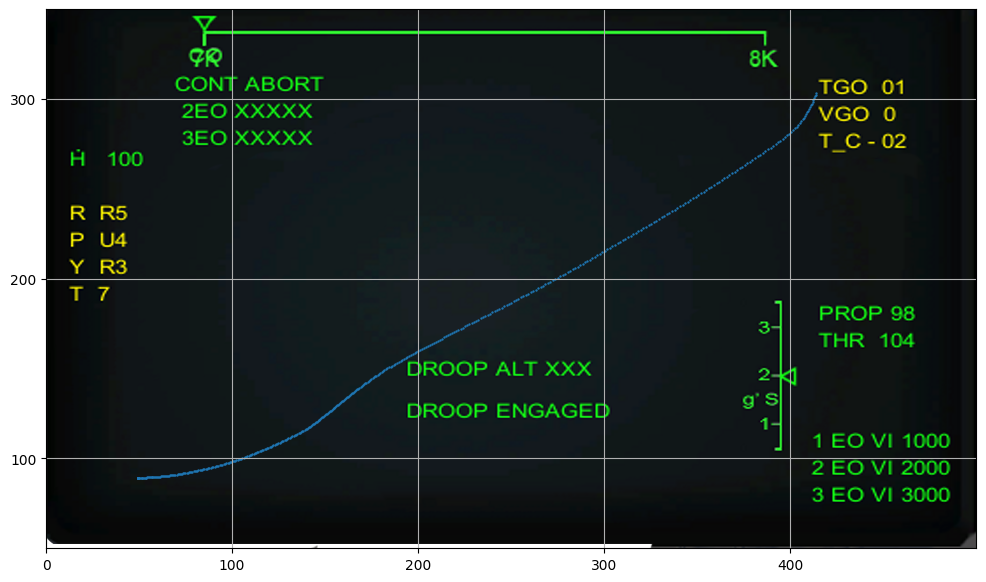

In [220]:
ascent_traj_disp(1, data)

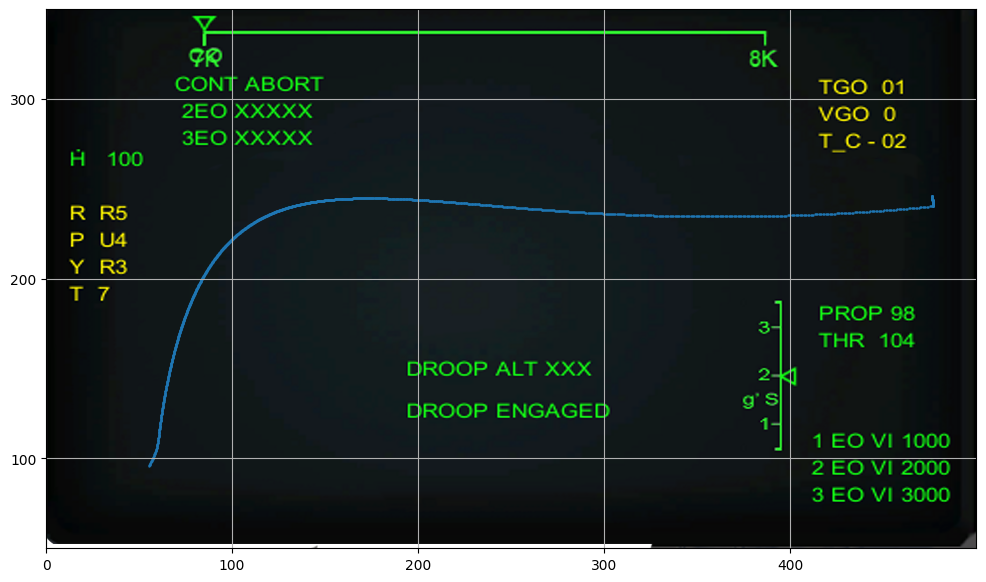

In [221]:
ascent_traj_disp(2, data)